In [90]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [91]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
label_encoder = preprocessing.LabelEncoder()
  
df['Gender']= label_encoder.fit_transform(df['Gender'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

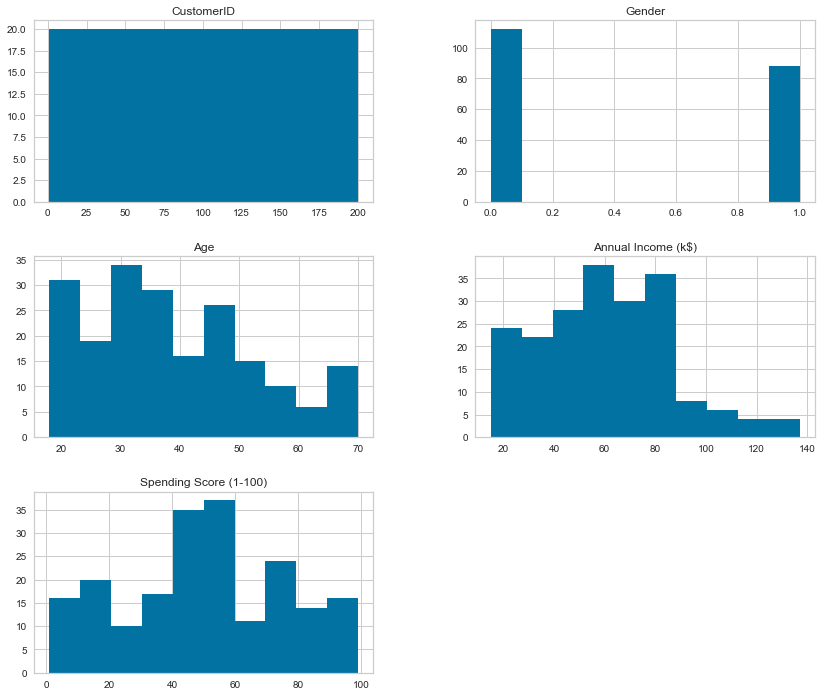

In [93]:
df.hist(figsize=(14,12))

# K-Means Model

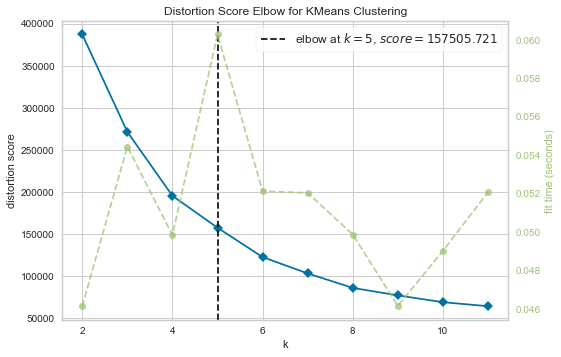

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [156]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(df) 
visualizer.poof()  

In [157]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df.iloc[:,1:])

In [158]:
k_fit.n_clusters

5

In [159]:
k_fit.cluster_centers_

array([[ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

In [160]:
k_fit.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [161]:
clusters = k_fit.labels_

Text(0, 0.5, 'Spending')

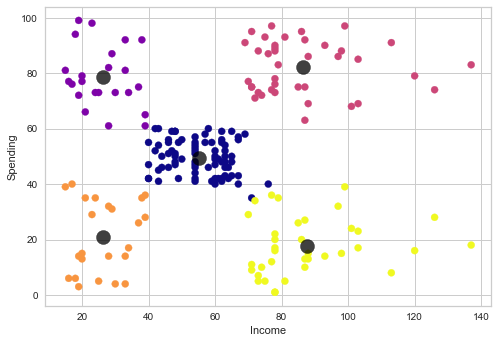

In [215]:
plt.scatter(df.iloc[:,3], df.iloc[:,4], c = clusters, s = 50, cmap = "plasma")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,2:3], centers[:,3:4], c = "black", s = 200, alpha = 0.75)
plt.xlabel("Income")
plt.ylabel("Spending")

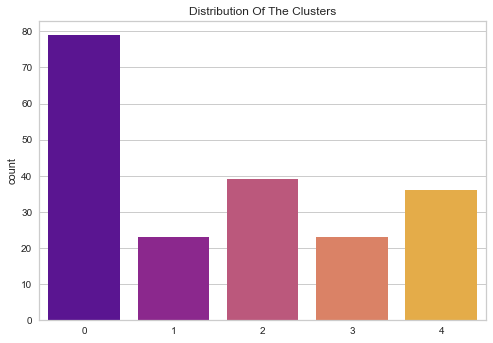

In [200]:
import seaborn as sns


pl = sns.countplot(x=clusters, palette= "plasma")
pl.set_title("Distribution Of The Clusters")
plt.show()

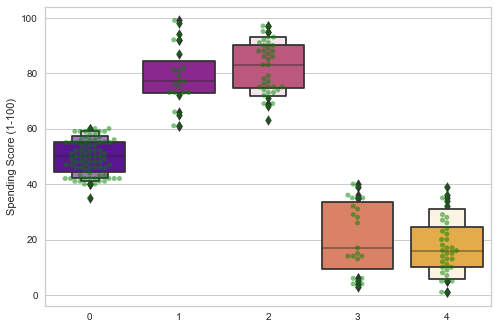

In [208]:
plt.figure()
pl=sns.swarmplot(x=clusters, y=df["Spending Score (1-100)"], color= "green", alpha=0.5 )
pl=sns.boxenplot(x=clusters, y=df["Spending Score (1-100)"], palette="plasma")
plt.show()

In [212]:
df["Cluster"] = clusters

In [214]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
26,27,0,45,28,32,3
89,90,0,50,58,46,0
7,8,0,23,18,94,1
40,41,0,65,38,35,3
134,135,1,20,73,5,4
71,72,0,47,49,42,0
36,37,0,42,34,17,3
